In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [602]:
# load the dataset
df = pd.read_csv('./data/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset has no null values, so we can proceed with the analysis.
Here RowNumber, CustomerId and Surname are not useful for analysis, so we can drop them.

In [604]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname']) 
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Let's see how many unique values are in the dataset

In [605]:
for column in df:
    print(f"{column}: {df[column].unique()}")

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [606]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [607]:
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


How many active members are exiting the business

In [608]:
ct = pd.crosstab(df["IsActiveMember"], df["Exited"])
ct

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


<Axes: xlabel='IsActiveMember'>

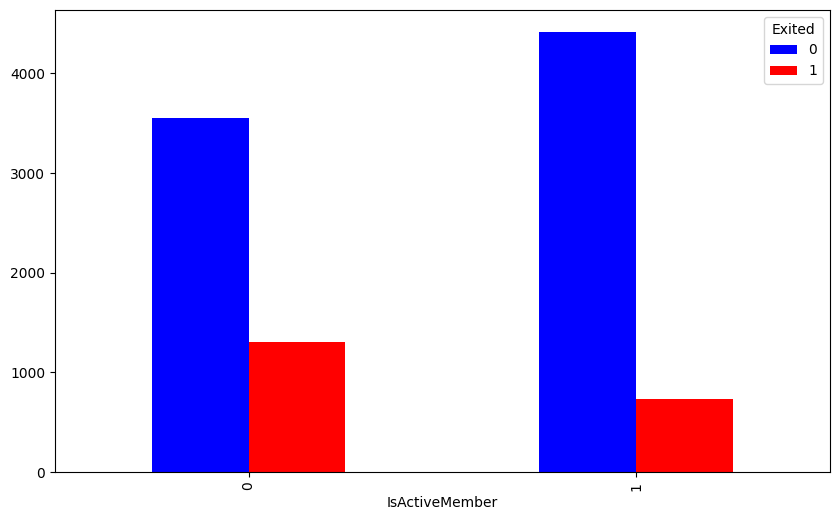

In [609]:
ct.plot(kind='bar', color = ['blue', 'red'], figsize=(10, 6))

How many customers are exiting the business with different tenures?

Text(0, 0.5, 'No. of Customers')

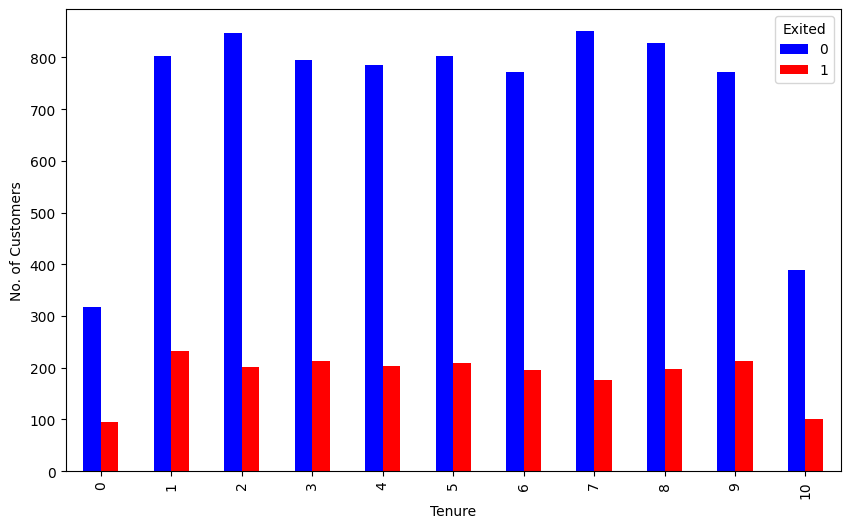

In [610]:
pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.ylabel('No. of Customers')

Geographical distribution of customers exiting the business

Text(0, 0.5, 'No. of Customers')

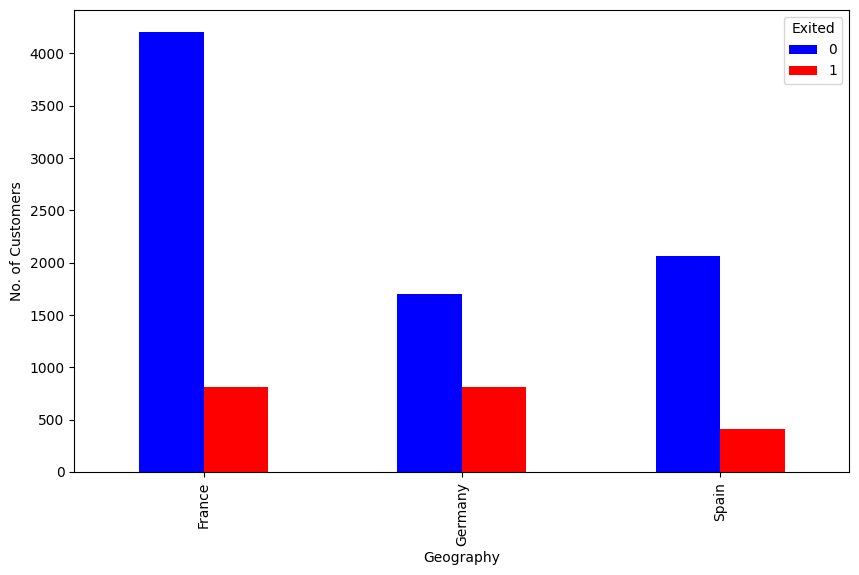

In [611]:
pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.ylabel('No. of Customers')

No of customers exiting the business with different amount of balance

In [612]:
exited = df[df['Exited'] == 1]
not_exited = df[df['Exited'] == 0]

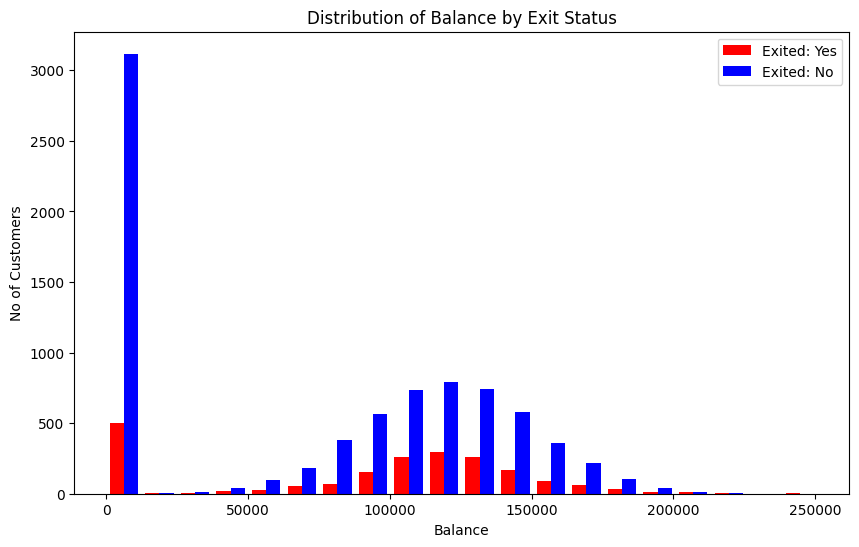

In [613]:
plt.figure(figsize=(10, 6))
plt.hist([exited['Balance'], not_exited['Balance']], bins=20, label=['Exited: Yes', 'Exited: No'], color=['red', 'blue'])
plt.xlabel('Balance')
plt.ylabel('No of Customers')
plt.title('Distribution of Balance by Exit Status')
plt.legend()
plt.show()

It's a normal distribution of Balancewise customer churn. So the customers of balance between around 75k to 175k are more likely to churn where a big amount of customers of this balance range are staying with th e business. But here the big number of customers with zero balance is with the company and they are not churning where around 500 customers with zero balance are churning.

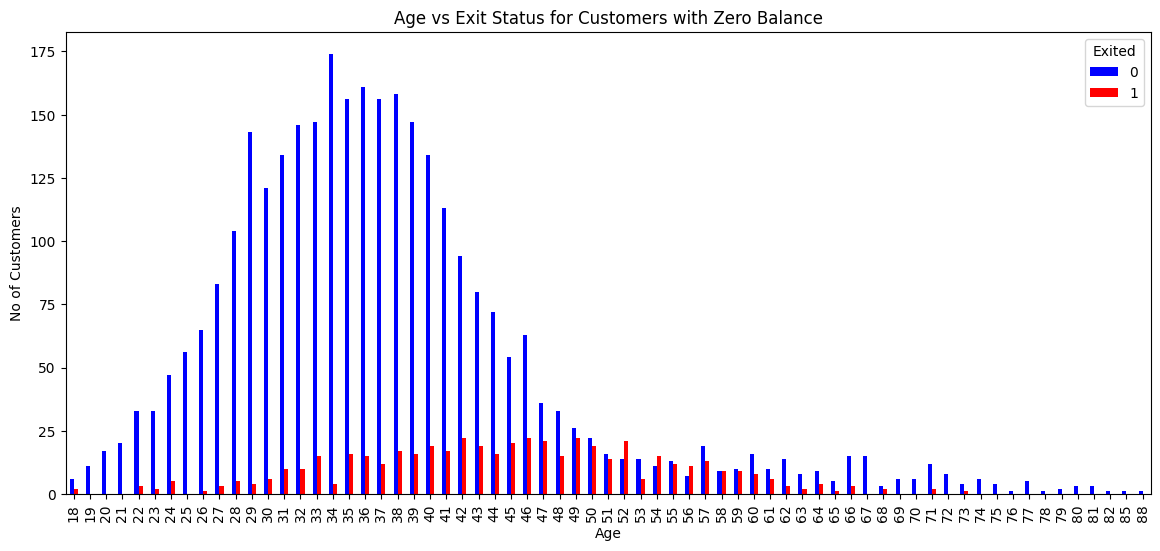

In [614]:
Balance_zero = df[df["Balance"] == 0]
pd.crosstab(Balance_zero['Age'], Balance_zero['Exited']).plot(kind='bar', figsize=(14, 6), color=['blue', 'red'])
plt.title('Age vs Exit Status for Customers with Zero Balance')
plt.xlabel('Age')
plt.ylabel('No of Customers')
plt.show()

Age distribution of customers exiting the business

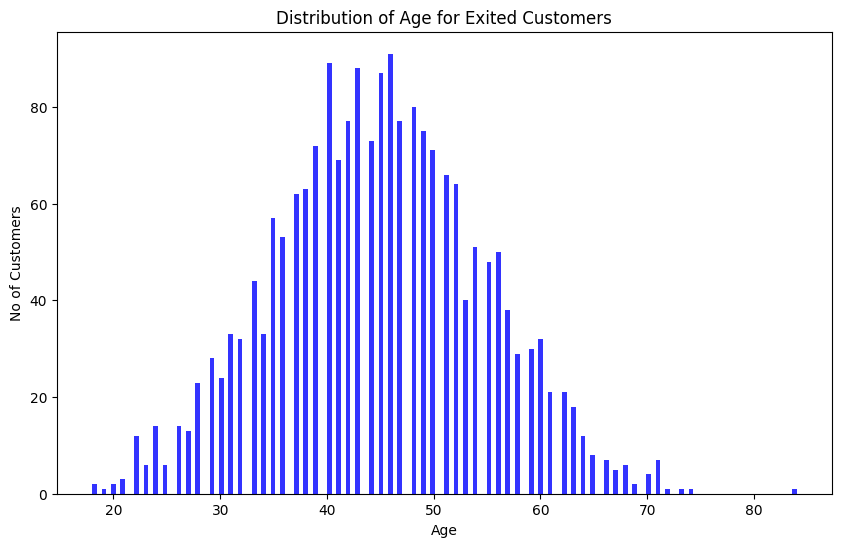

In [615]:
plt.figure(figsize=(10, 6))
plt.hist(exited['Age'], bins=150, color='blue', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('No of Customers')
plt.title('Distribution of Age for Exited Customers')
plt.show()

Relationship between Tenure and Exit Status

C:\Users\ratul\AppData\Local\Temp\ipykernel_13472\3066718972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Tenure', data=df, palette=['blue', 'red'])


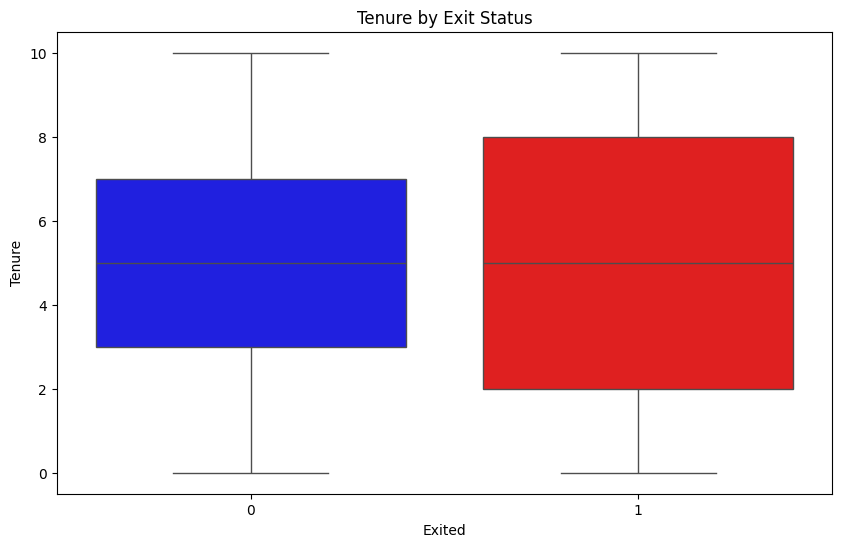

In [616]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=df, palette=['blue', 'red'])
plt.title('Tenure by Exit Status')
plt.xlabel('Exited')
plt.ylabel('Tenure')
plt.show()

Estimated salary distribution of customers exiting the business

In [617]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

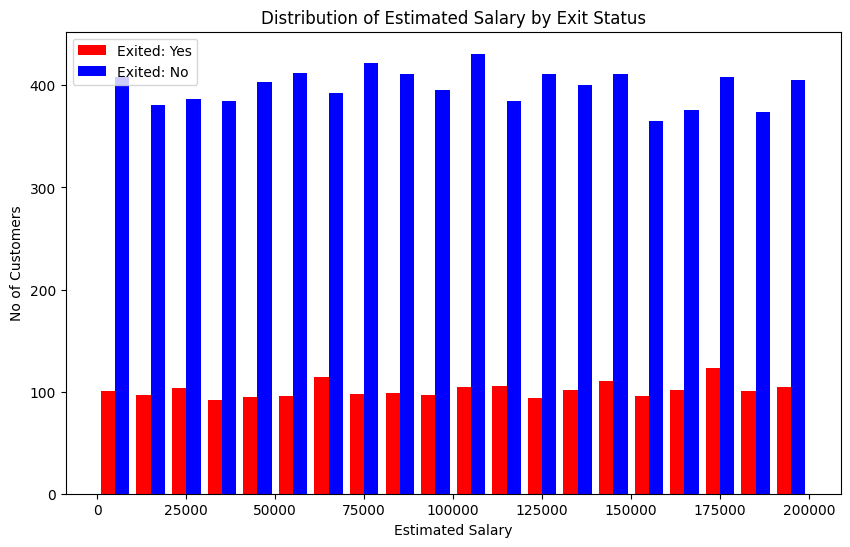

In [618]:
plt.figure(figsize=(10, 6))
plt.hist([exited['EstimatedSalary'], not_exited['EstimatedSalary']], bins=20, label=['Exited: Yes', 'Exited: No'], color=['red', 'blue'])
plt.xlabel('Estimated Salary')
plt.ylabel('No of Customers')
plt.title('Distribution of Estimated Salary by Exit Status')
plt.legend()
plt.show()

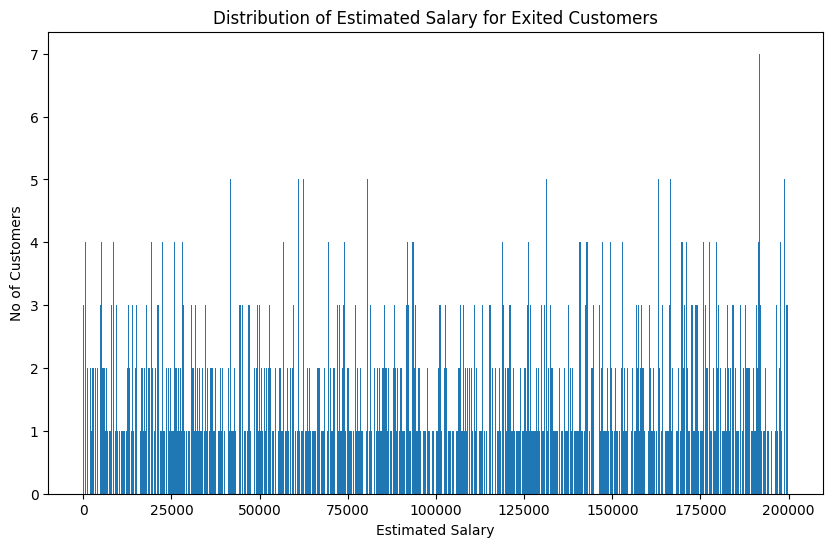

In [619]:
plt.figure(figsize=(10, 6))
plt.hist(exited['EstimatedSalary'], bins=1500)
plt.xlabel('Estimated Salary')
plt.ylabel('No of Customers')
plt.title('Distribution of Estimated Salary for Exited Customers')
plt.show()

(array([5., 3., 1., ..., 4., 4., 4.]),
 array([9.00700000e+01, 1.70030964e+02, 2.49991928e+02, ...,
        1.99832558e+05, 1.99912519e+05, 1.99992480e+05]),
 <BarContainer object of 2500 artists>)

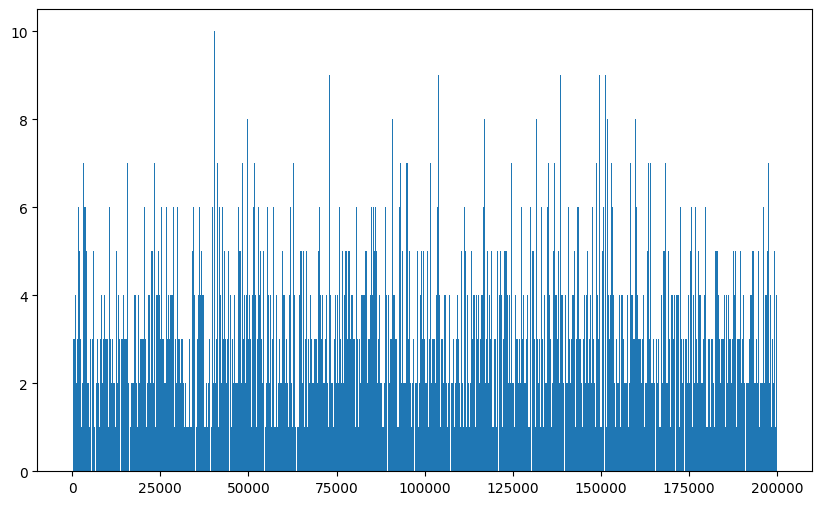

In [620]:
plt.figure(figsize=(10, 6))
plt.hist(not_exited['EstimatedSalary'], bins=2500)

There are outliers here. We will remove them by percentile method.

In [621]:
lower_bound = df['EstimatedSalary'].quantile(0.01)
upper_bound = df['EstimatedSalary'].quantile(0.99)
df_new = df[(df['EstimatedSalary'] >= lower_bound) & (df['EstimatedSalary'] <= upper_bound)]
df_new['EstimatedSalary'].describe()

count      9800.000000
mean     100092.297339
std       56343.674605
min        1843.240000
25%       52042.317500
50%      100193.915000
75%      148242.727500
max      198069.710000
Name: EstimatedSalary, dtype: float64

In [622]:
df_new.shape

(9800, 11)

In [623]:
df1 = df_new.copy()

From here we use the df1 DataFrame

Applying one hot encoding on The objects columns by pd.get_dummies

In [624]:
objects = df1.select_dtypes(include=['object']).columns
objects

Index(['Geography', 'Gender'], dtype='object')

In [625]:
dummies = pd.get_dummies(df1[objects], drop_first=True)
dummies

,Geography_Germany,Geography_Spain,Gender_Male
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,True,False
...,...,...,...
9995,False,False,True
9996,False,False,True
9997,False,False,False
9998,True,False,True


In [626]:
df1 = pd.concat([df1, dummies], axis=1)
df1 = df1.drop(columns=objects)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [627]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


Now There are no object columns in the DataFrame. For Neural Network we need to scale the data. We sclale the data using sklearn's MinMaxScaler which scales the data between 0 and 1.

In [628]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
df1[cols_to_scale].sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
7129,1.000,0.202703,0.3,0.400467,0.333333,0.686431
2848,1.000,0.310811,0.5,0.000000,0.333333,0.168092
8161,0.476,0.175676,0.4,0.397003,0.333333,0.173441
8051,0.510,0.513514,0.1,0.295455,0.333333,0.307586
6029,0.618,0.351351,0.9,0.093677,0.000000,0.856249


Now we will build our model

First define the input and output variables

In [629]:
x = df1.drop(columns=['Exited'])
y = df1['Exited']

Then we will split the data into training and testing sets. We will use 70% of the data for training and 30% for testing.

In [630]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6860, 11), (2940, 11), (6860,), (2940,))

Bulding the Neural Network model

In [631]:
import tensorflow as tf
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(x_train.shape[1],)),
        keras.layers.Dense(12, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

Calling the function as my_model

In [632]:
my_model = get_model()
my_model.summary()

c:\Users\ratul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)            │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 100)            │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,545 (6.04 KB)

 Trainable params: 1,545 (6.04 KB)

 Non-trainable params: 0 (0.00 B)

Running the model with my GPU

In [633]:
with tf.device('/GPU:0'):
    my_model = get_model()
    my_model.fit(x_train, y_train, epochs=100)
my_model.evaluate(x_test, y_test)

Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7740 - loss: 0.5383
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8013 - loss: 0.4602
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8018 - loss: 0.4538
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8093 - loss: 0.4386
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8089 - loss: 0.4375
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8207 - loss: 0.4218
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8233 - loss: 0.4124
Epoch 8/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8235 - loss: 0.4136
Epoch 9/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8308 - loss: 0.3974
Epoch 10/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8200 - loss: 0.4194
Epoch 11/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8341 - loss: 0.4017
Epoch 12/100
215/215 ━━━━━━━━━━━━━━━━━━━━

[0.3454798758029938, 0.8608843684196472]

Let's visualize the accuracy and loss of the model over the epochs

Text(0.5, 1.0, 'Training Accuracy Over Epochs')

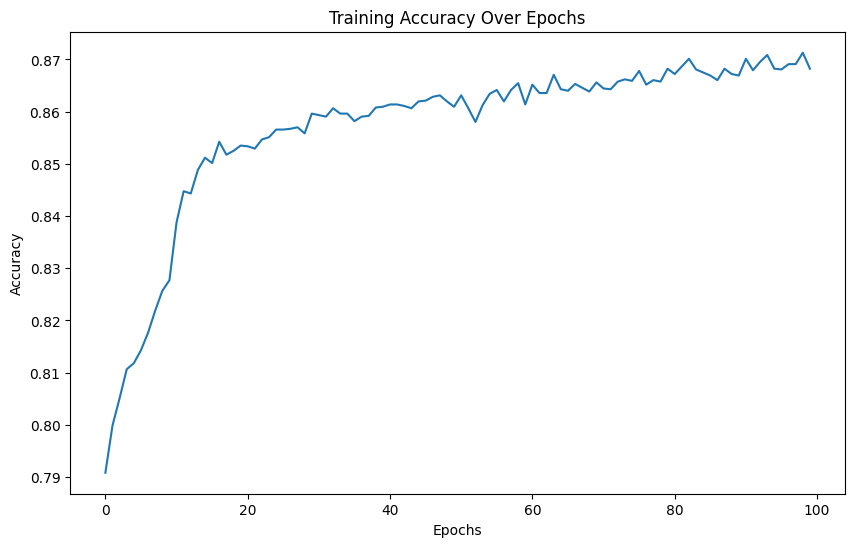

In [634]:
plt.figure(figsize=(10, 6))
plt.plot(my_model.history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')

Text(0.5, 1.0, 'Training Loss Over Epochs')

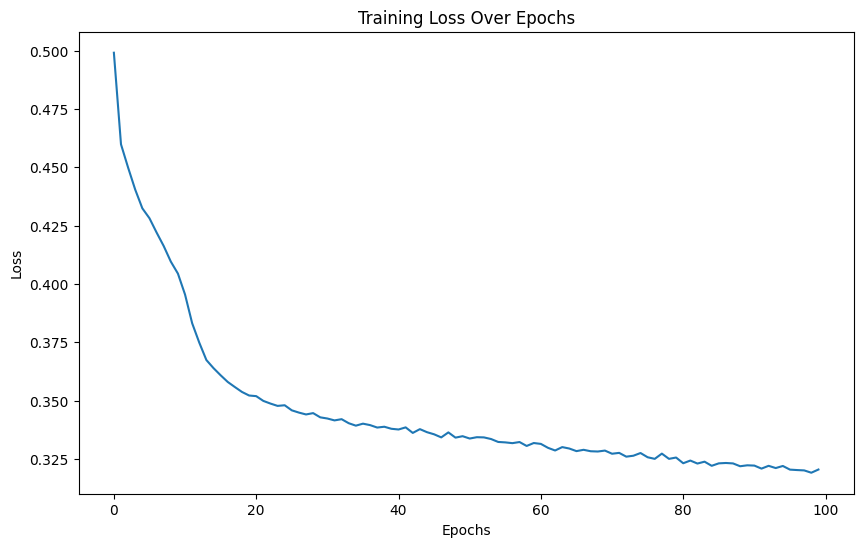

In [635]:
plt.figure(figsize=(10, 6))
plt.plot(my_model.history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

The Accuracy of the model is more than 86%. Now we will predict the exit status of the customers

In [643]:
y_pred = my_model.predict(x_test)
y_pred[:10]

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.01132366],
       [0.01892418],
       [0.05085206],
       [0.06013556],
       [0.02124779],
       [0.11872777],
       [0.03725098],
       [0.1555386 ],
       [0.01691365],
       [0.17985682]], dtype=float32)

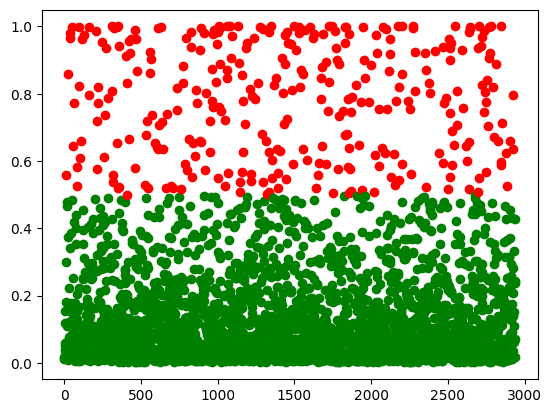

In [644]:
for i in range(len(y_pred)):
    plt.scatter(i, y_pred[i], color='red' if y_pred[i] > 0.5 else 'green')

We have used Sigmoid activation function in the output layer, so we will round the predictions to get the final exit status. We put a threshold of 0.5 to classify the customers as exiting or not exiting. Greater than 0.5 will be classified as exiting and less than 0.5 will be classified as not exiting.

In [654]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [655]:
y_pred[10:20]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [656]:
y_test[10:20]

9397    0
5506    0
8827    0
7324    1
4493    0
260     0
2208    1
2709    0
2331    0
6608    0
Name: Exited, dtype: int64

In [680]:
correctMatches = 0
incorrectMatches = 0
correctMatchesList = []
incorrectMatchesList = []

for i in range(len(y_pred)):
    if int(y_test.iloc[i]) == int(y_pred[i][0]):
        correctMatches += 1
        correctMatchesList.append(i)
    else:
        incorrectMatches += 1
        incorrectMatchesList.append(i)
print(f"Total Correct Predictions: {correctMatches}")
print(f"Total Incorrect Predictions: {incorrectMatches}")

Total Correct Predictions: 2531
Total Incorrect Predictions: 409


In [684]:
correctMatchesList

[0,
 1,
 2,
 3,
 4,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 28,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 181,
 183,
 184,
 185,
 186,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 

In [685]:
incorrectMatchesList

[5,
 6,
 16,
 24,
 25,
 29,
 32,
 43,
 48,
 54,
 58,
 70,
 81,
 92,
 96,
 109,
 111,
 125,
 131,
 155,
 179,
 180,
 182,
 187,
 188,
 189,
 212,
 214,
 225,
 230,
 236,
 242,
 253,
 255,
 268,
 280,
 283,
 284,
 285,
 300,
 310,
 312,
 316,
 323,
 333,
 344,
 345,
 358,
 366,
 384,
 390,
 393,
 402,
 409,
 431,
 437,
 445,
 456,
 466,
 467,
 468,
 475,
 482,
 490,
 497,
 509,
 513,
 531,
 541,
 572,
 576,
 582,
 584,
 590,
 605,
 608,
 612,
 615,
 616,
 651,
 654,
 669,
 671,
 676,
 677,
 678,
 680,
 689,
 690,
 693,
 694,
 702,
 707,
 711,
 723,
 736,
 738,
 741,
 750,
 751,
 770,
 774,
 780,
 781,
 787,
 790,
 798,
 803,
 804,
 805,
 808,
 810,
 824,
 833,
 839,
 850,
 861,
 866,
 867,
 875,
 887,
 888,
 892,
 893,
 894,
 902,
 910,
 911,
 914,
 923,
 935,
 938,
 951,
 954,
 977,
 979,
 981,
 988,
 991,
 993,
 995,
 1001,
 1002,
 1010,
 1013,
 1025,
 1028,
 1041,
 1055,
 1067,
 1072,
 1073,
 1074,
 1076,
 1084,
 1108,
 1115,
 1116,
 1119,
 1120,
 1122,
 1124,
 1125,
 1134,
 1138,
 11

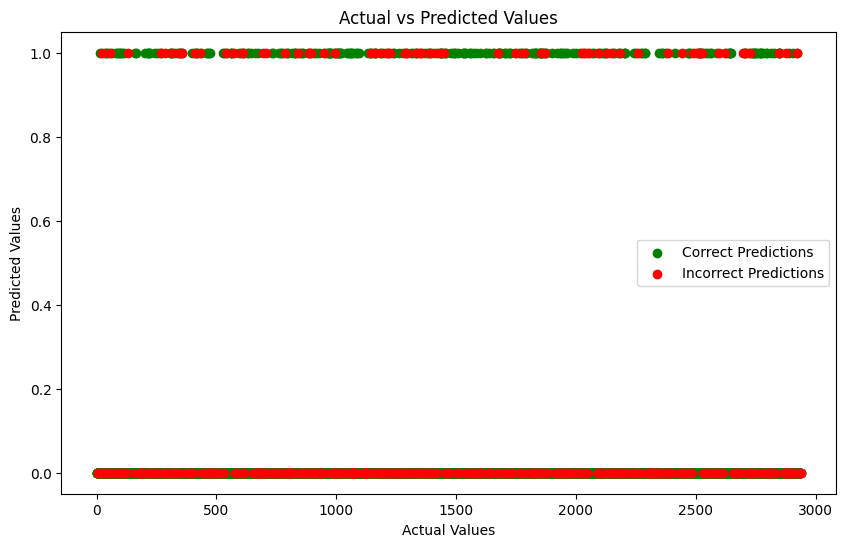

In [686]:
plt.figure(figsize=(10, 6))
plt.scatter(correctMatchesList, y_pred[correctMatchesList], color='green', label='Correct Predictions')
plt.scatter(incorrectMatchesList, y_pred[incorrectMatchesList], color='red', label='Incorrect Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Let's check the performance of our model using confusion matrix and classification report

In [640]:
from sklearn.metrics import confusion_matrix, classification_report

classification_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2350
           1       0.78      0.42      0.55       590

    accuracy                           0.86      2940
   macro avg       0.83      0.70      0.73      2940
weighted avg       0.85      0.86      0.84      2940



Confusion Matrix

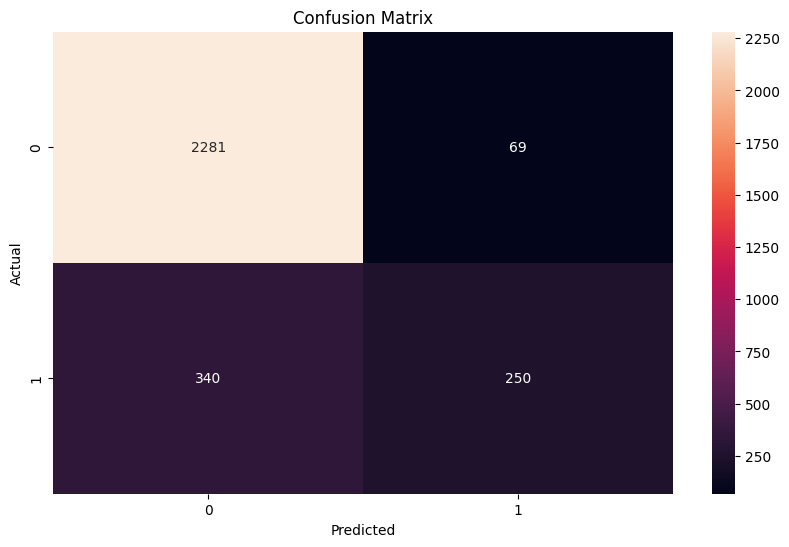

In [641]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()